In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np

from collections import Counter

from time import time

In [3]:
# this function returns the factorial of an integer passed to it
def factorial(n):
    if n<=1:
        return 1
    else:
        return n*factorial(n-1)

<font size=4>
<b>Geometric Distribution:</b>
<br>
Definition 1: Probability distribution that describes the number <i><b>n</b></i> Bernoulli trials needed to get a successful outcome
<br>
Definition 2: Probability distribution that describes the number <i><b>n</b></i> Bernoulli trials that fail before the first successful outcome
<br><br>
<i>
<b>Examples:</b>
<br>
Ex. 1: How many times will I need to roll a fair six-sided die to get a 5 ?
<br>
Ex. 2: How many times will I need to roll a fair six-sided die <u>before</u> I get a 5 ?
</i>
<br><br>
Note that these two problems are slightly different.
<br>
The first suggest <i><u>"I am successful on my n-th roll"</u></i> while the second suggests <i><u>"I am successful after my n-th failure"</u></i>
<br><br>
I treat only the first definition in this notebook. The second definition is easy to implement following the same example
<br><br>
</font>

In [4]:
# number of trials to run (where each trial is run until a successful outcome)
numSamples = 1000000

# the possible outcomes - the numbers on the die faces
dieFaces = [1,2,3,4,5,6]

# target number for successful outcome
targetSuccess = 5

# probability of success at each roll
p = 1/len(dieFaces)

In [5]:
# this function carries out one trial and returns the number of rolls it takes to get a successful outocome

def run_sample(dfc=dieFaces, tgt=targetSuccess):
    thisRoll = 0
    cnt = 0
    while thisRoll!=tgt:
        cnt+=1
        thisRoll = np.random.choice(dfc)
    return cnt

In [6]:
startTime = time()

# this list holds the results (where each result is the number rolls it takes to get a successful outcome)
result = []

# run several trials and save the results
for i in range(numSamples):
    result.append(run_sample(dfc=dieFaces, tgt=targetSuccess))

endTime = time()

print('Duration:', round(endTime-startTime, 2), 'seconds')

Duration: 89.07 seconds


In [7]:
n = 7 # what is the probability that we'll get a successful outcome on the n-th roll ?

print('PROBABILITY OF SUCCESS ON THE ' + str(n) + '-th ROLL:')

# probability obtained from the sampling
rr = Counter(result)
sampleProb = rr[n]/numSamples
print('\tSampled Probability (in ' + str(numSamples) + ' experiments):', round(sampleProb, 4))

# calculate the theoretical probability (using the geometric PDF)
theoretProb = ((1-p)**(n-1))*p
print('\tTheoretical Probability (from geometric PDF):', round(theoretProb, 4))

PROBABILITY OF SUCCESS ON THE 7-th ROLL:
	Sampled Probability (in 1000000 experiments): 0.0556
	Theoretical Probability (from geometric PDF): 0.0558


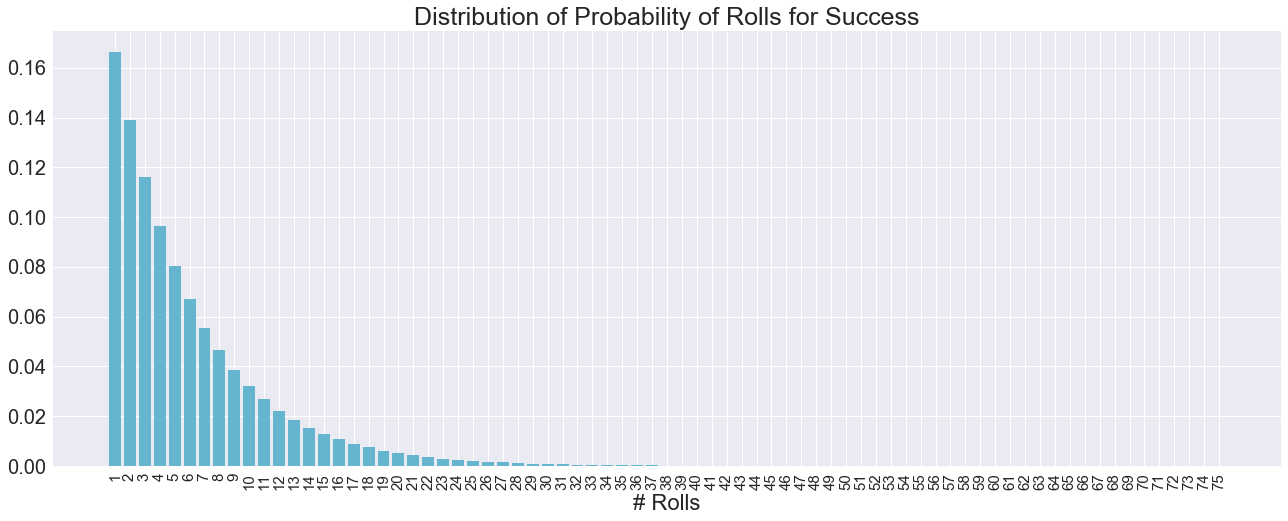

In [8]:
rangeLow = min(rr.keys())
rangeHigh = max(rr.keys())

px = list(range(rangeLow, rangeHigh+1))
py = [rr[i] if (i in rr.keys()) else 0 for i in px]
pz = [i/numSamples for i in py]

# plot the distribution the probability of correct guesses
plt.figure(figsize=[22,8])
plt.bar(px, pz, color='C5')
plt.xticks(px, fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('# Rolls', fontsize=22)
plt.title('Distribution of Probability of Rolls for Success', fontsize=25)

plt.show()

In [9]:
for i,j in list(zip(px,pz))[:25]: # print first few probabilities
    print('Prob. of success on ' + str(i) + '-th roll:', round(j,6))

Prob. of success on 1-th roll: 0.166396
Prob. of success on 2-th roll: 0.138908
Prob. of success on 3-th roll: 0.116067
Prob. of success on 4-th roll: 0.096458
Prob. of success on 5-th roll: 0.080501
Prob. of success on 6-th roll: 0.067225
Prob. of success on 7-th roll: 0.055594
Prob. of success on 8-th roll: 0.046593
Prob. of success on 9-th roll: 0.038738
Prob. of success on 10-th roll: 0.032143
Prob. of success on 11-th roll: 0.027052
Prob. of success on 12-th roll: 0.022229
Prob. of success on 13-th roll: 0.018613
Prob. of success on 14-th roll: 0.015442
Prob. of success on 15-th roll: 0.01302
Prob. of success on 16-th roll: 0.010859
Prob. of success on 17-th roll: 0.009001
Prob. of success on 18-th roll: 0.007577
Prob. of success on 19-th roll: 0.006186
Prob. of success on 20-th roll: 0.005223
Prob. of success on 21-th roll: 0.00432
Prob. of success on 22-th roll: 0.003649
Prob. of success on 23-th roll: 0.003017
Prob. of success on 24-th roll: 0.002504
Prob. of success on 25-th r